In [14]:
from fastquant import get_stock_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from gaussian_hmm_close import *
from simple_moving_average import *

In [15]:
f = open("tickers.txt", "r")
tickers = [s.strip('\n') for s in f.readlines()]

In [16]:
def test(ticker):
    try:
        print(ticker)
        # getting data
        training_data = get_stock_data(ticker,'2020-06-01','2021-01-01')
        testing_data = get_stock_data(ticker, '2021-01-01', '2021-05-11')
        openings = testing_data['open'].values
        # bulding model
        params = {'n_components': 2, 
          'algorithm': 'map', 
          'n_iter': 5000, 
          'd': 5,
          'name':'GHMM'}
        ghmm = GHMM(params=params)

        sma_params = {'d': 3, 'name': 'SMA-3'}
        sma = SMA(params=sma_params)

        # train pred
        ghmm.train(training_data)
        preds,actual = ghmm.predict(testing_data)

        sma.train(training_data)
        preds_sma, actual_sma = sma.predict(testing_data)

        # MAPE
        error = ghmm.mean_abs_percent_error(preds,actual)
        print(f'ghmm error: {error}')

        sma_error = sma.mean_abs_percent_error(preds_sma, actual_sma)
        print(f'sma error: {sma_error}')

        # acc error
        preds_df = pd.DataFrame(preds)
        actual_df = pd.DataFrame(actual)
        pred_change = preds_df.pct_change()
        actual_change = actual_df.pct_change()
        pred_change = list(pred_change.iloc[1:].values.flatten())
        actual_change = list(actual_change.iloc[1:].values.flatten())
        pred_change = list(map(lambda n: n>0, pred_change))
        actual_change = list(map(lambda n: n>0, actual_change))
        acc = [x == y for x,y in zip(pred_change,actual_change)]
        acc = sum(acc)/len(acc)
        print(f'GHMM Trend accuracy: {acc}')

        preds_df = pd.DataFrame(preds_sma)
        actual_df = pd.DataFrame(actual_sma)
        pred_change = preds_df.pct_change()
        actual_change = actual_df.pct_change()
        pred_change = list(pred_change.iloc[1:].values.flatten())
        actual_change = list(actual_change.iloc[1:].values.flatten())
        pred_change = list(map(lambda n: n>0, pred_change))
        actual_change = list(map(lambda n: n>0, actual_change))
        acc = [x == y for x,y in zip(pred_change,actual_change)]
        acc = sum(acc)/len(acc)
        print(f'SMA Trend accuracy: {acc}')

        # graphing
        fig, ax = plt.subplots(figsize=(15,5))
        ax.set_title(ticker)
        time = range(len(preds))
        ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='ghmm')
        ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
        ax.set_xlabel('time')
        ax.set_ylabel('stock price ($)')
        ax.set_xticks(np.arange(0,len(preds)+10,10))
        ax.set_xlim(0,len(preds)+10)
        ax.xaxis.grid(True,ls='--')
        ax.yaxis.grid(True,ls='--')
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(figsize=(15,5))
        ax.set_title(ticker)
        time = range(len(ghmm.train_obs))
        ax.plot(time,ghmm.train_obs,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='train_data')
        #ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
        ax.set_xlabel('time')
        ax.set_ylabel('stock price ($)')
        ax.set_xticks(np.arange(0,len(ghmm.train_obs)+10,10))
        ax.set_xlim(0,len(ghmm.train_obs)+10)
        ax.xaxis.grid(True,ls='--')
        ax.yaxis.grid(True,ls='--')
        ax.legend()
        plt.show()
    except:
        print('ticker not old enough')

AAPL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DONE8
DONE8
ghmm error: 8895.164117540251
sma error: 1.8221873552620806
GHMM Trend accuracy: 0.6666666666666666
SMA Trend accuracy: 0.4367816091954023


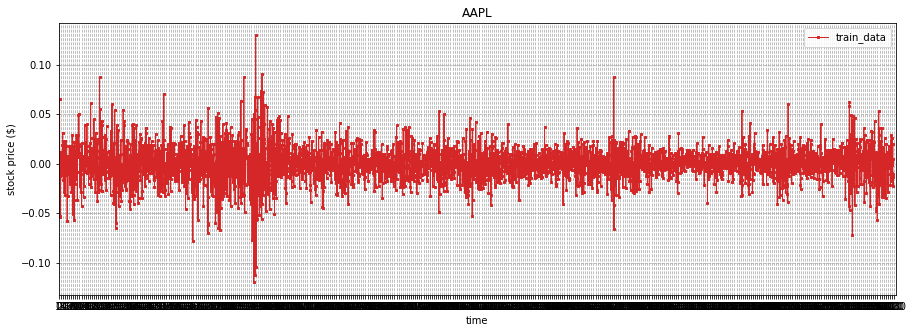

TSLA
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ticker not old enough
TSM
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Process ForkPoolWorker-2890:
Process ForkPoolWorker-2887:
Process ForkPoolWorker-2884:
Process ForkPoolWorker-2888:
Process ForkPoolWorker-2886:
Process ForkPoolWorker-2892:
Process ForkPoolWorker-2885:
Process ForkPoolWorker-2882:
Process ForkPoolWorker-2889:
Process ForkPoolWorker-2883:
Process ForkPoolWorker-2891:
Process ForkPoolWorker-2881:
Process ForkPoolWorker-2893:
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/usr/lib64/python3.6/multiprocessing/process.

ticker not old enough
HD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Process ForkPoolWorker-3013:
Process ForkPoolWorker-3010:
Process ForkPoolWorker-3009:
Process ForkPoolWorker-3011:
Process ForkPoolWorker-3002:
Process ForkPoolWorker-3001:
Process ForkPoolWorker-3007:
Process ForkPoolWorker-3006:
Process ForkPoolWorker-3004:
Process ForkPoolWorker-3012:
Process ForkPoolWorker-3003:
Process ForkPoolWorker-3005:
Process ForkPoolWorker-3008:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    s

  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
KeyboardInterrupt
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 283, in score
    X = check_array(X)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 505, in _do_forward_pass
    log_mask_zero(self.transmat_),
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 288, in score
    logprobij, _fwdlattice = self._do_forward_pass(framelogprob)
Traceback (most recent call last):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/tr

  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/scipy/special/_logsumexp.py", line 114, in logsumexp
    s = np.sum(tmp, axis=axis, keepdims=keepdims)
  File "<__array_function__ internals>", line 6, in allclose
KeyboardInterrupt
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/stats.py", line 37, in log_multivariate_normal_density
    X, means, covars
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python

  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/numeric.py", line 2287, in isclose
    xfin = isfinite(x)
  File "<__array_function__ internals>", line 6, in isclose
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/sklearn/utils/validation.py", line 664, in check_array
    allow_nan=force_all_finite == 'allow-nan')
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/hmm.py", line 219, in _check
    super()._check()
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/shape_base.py", line 283, in vstack
    return _nx.concatenate(arrs, 0)
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/hmm.py", line 219, in _check
    super()._check()
  File "<__array_function__ internals>", line 6, in allclose
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib

ticker not old enough
PLUG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Process ForkPoolWorker-3228:
Process ForkPoolWorker-3232:
Process ForkPoolWorker-3229:
Process ForkPoolWorker-3225:
Process ForkPoolWorker-3231:
Process ForkPoolWorker-3227:
Process ForkPoolWorker-3223:
Process ForkPoolWorker-3224:
Process ForkPoolWorker-3226:
Process ForkPoolWorker-3233:
Process ForkPoolWorker-3221:
Process ForkPoolWorker-3222:
Process ForkPoolWorker-3230:
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-3238:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multip

Traceback (most recent call last):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/trading/gaussian_hmm.py", line 80, in log_lik_calc
    log_lik = self.model.score(obs)
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 47, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
Traceback (most recent call last):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 281, in score
    self._check()
Traceback (most recent call last):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 283, in score
    X = check_array(X)
Traceback (most recent call last):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/trading/gaussian_hmm.py", line 80, in log_lik_calc
    log_lik = self.model.score(obs)
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/trading/gaussian_hmm.py", line 80, in log_lik_calc
    log_lik = self.model.score(obs)
  File "/nfs/nfs7/home

  File "/usr/lib64/python3.6/warnings.py", line 155, in simplefilter
    assert isinstance(lineno, int) and lineno >= 0, \
  File "/usr/lib64/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/scipy/special/_logsumexp.py", line 113, in logsumexp
    with np.errstate(divide='ignore'):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/scipy/special/_logsumexp.py", line 113, in logsumexp
    with np.errstate(divide='ignore'):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 591, in _check
    if not np.allclose(self.startprob_.sum(), 1.0):
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/hmmlearn/base.py", line 599, in _check
    if not np.allclose(self.transmat_.sum(axis=1), 1.0):
  File "<__array_function__ intern

  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/shape_base.py", line 280, in vstack
    arrs = atleast_2d(*tup)
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/fromnumeric.py", line 2411, in all
    return _wrapreduction(a, np.logical_and, 'all', axis, None, out, keepdims=keepdims)
KeyboardInterrupt
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/numeric.py", line 2290, in isclose
    return within_tol(x, y, atol, rtol)
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/numpy/core/numeric.py", line 2189, in allclose
    res = all(isclose(a, b, rtol=rtol, atol=atol, equal_nan=equal_nan))
  File "/nfs/nfs7/home/rowlavel/stock-forecasting/proj_env/lib64/python3.6/site-packages/scipy/special/_logsumexp.py", line 99, in logsumexp
    a_max = np.amax(a, axis=axis, keepdims=True)
  File "/nfs/nfs7/home

ticker not old enough
DKNG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Process ForkPoolWorker-3405:
Process ForkPoolWorker-3409:
Process ForkPoolWorker-3412:
Process ForkPoolWorker-3407:
Process ForkPoolWorker-3408:
Process ForkPoolWorker-3406:
Process ForkPoolWorker-3402:
Process ForkPoolWorker-3411:
Process ForkPoolWorker-3403:
Process ForkPoolWorker-3404:
Process ForkPoolWorker-3410:
Process ForkPoolWorker-3413:
Process ForkPoolWorker-3401:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib6

In [ ]:
for ticker in tickers:
    test(ticker)

In [ ]:
test('GME')

GME
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
test('SPY')